In [17]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [3]:
#FashionMNIST dataset is a collection of grayscale images (28 pixels by 28 pixels) 

In [4]:
fashion_mnist_df = pd.read_csv('fashion-mnist_train.csv')

In [5]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_mnist_df.shape

(60000, 785)

In [7]:
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)

fashion_mnist_df.shape

(18000, 785)

In [8]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,126,127,121,125,0,0,0,0,0,0
2,4,0,0,0,0,1,0,2,3,0,...,1,0,0,0,151,171,51,0,0,0
3,2,0,0,0,0,0,0,1,0,0,...,1,2,0,0,81,135,0,0,0,0
4,8,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,1,6,0,2,0


In [9]:
LOOKUP = {0: 'T-Shirt',
         1: 'Trouser',
         2: 'Pullover',
         3: 'Dress',
         4: 'Coat',
         5: 'Sandal',
         6: 'Shirt',
         7: 'Sneaker',
         8: 'Bag',
         9: 'Ankle boot'}

In [18]:
def display_image(features, actual_label):
    print 'Actual Label: ', LOOKUP[actual_label]
    
    plt.imshow(features.reshape(28,28))

In [19]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]

y = fashion_mnist_df['label']

In [20]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,126,127,121,125,0,0,0,0,0,0
2,0,0,0,0,1,0,2,3,0,0,...,1,0,0,0,151,171,51,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,2,0,0,81,135,0,0,0,0
4,0,0,0,0,0,0,0,0,7,13,...,0,0,0,0,0,1,6,0,2,0


In [21]:
y.head()

0    7
1    8
2    4
3    2
4    8
Name: label, dtype: int64

In [22]:
X.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  97,  84,
        97, 110, 108,  87,  97,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19,
       255, 199, 183, 142, 161, 200, 213,  32,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  72, 174, 173, 158, 131, 132, 176, 176,  70,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 142, 180, 163, 120, 180, 126])

In [23]:
y.loc[5]

1

Actual Label:  Trouser


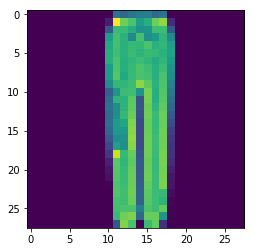

In [24]:
display_image(X.loc[5].values, y.loc[5])

Actual Label:  Ankle boot


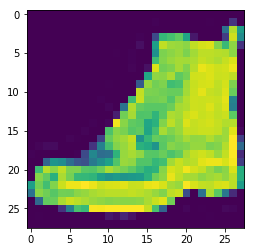

In [25]:
display_image(X.loc[567].values, y.loc[567])

Actual Label:  T-Shirt


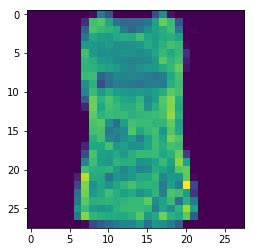

In [26]:
display_image(X.loc[15088].values, y.loc[15088])

In [27]:
X = X /255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,...,0.494118,0.498039,0.47451,0.490196,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.003922,0.0,0.007843,0.011765,0.000000,0.00000,...,0.003922,0.000000,0.00000,0.000000,0.592157,0.670588,0.200000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.003922,0.000000,0.000000,0.00000,...,0.003922,0.007843,0.00000,0.000000,0.317647,0.529412,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.027451,0.05098,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.003922,0.023529,0.0,0.007843,0.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
X_train.shape, y_train.shape

((14400, 784), (14400,))

In [30]:
X_test.shape,y_test.shape

((3600, 784), (3600,))

In [31]:
def summarize_classification(y_test, y_pred, avg_method = 'weighted'):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    
    print 'Test data count:', len(y_test)
    print 'accuracy: ', acc
    print 'precision: ', prec
    print 'recall: ', rec
    print 'accuracy_count:', num_acc
    print ' '

In [32]:
logistic_model = LogisticRegression(solver='sag', multi_class='auto',max_iter=10000).fit(X_train, y_train)

In [34]:
y_pred = logistic_model.predict(X_test)

In [35]:
y_pred

array([5, 6, 6, ..., 5, 1, 1])

In [36]:
summarize_classification(y_test, y_pred)

Test data count: 3600
accuracy:  0.8283333333333334
precision:  0.8284024164084297
recall:  0.8283333333333334
accuracy_count: 2982
 
